In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('2018-deduplicated.csv')

/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (12) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
df['月租金'].unique()

array([7800, 2000, 18000, ..., 19480, 10580, 55600], dtype=object)

In [4]:
df = df[df['月租金'] != '-']
df['月租金'] = pd.to_numeric(df['月租金'],errors='coerce')

In [5]:
df['月租金'].isnull().sum()

0

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 508543 entries, 0 to 508544
Data columns (total 73 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   重複物件數            508543 non-null  int64  
 1   最大物件編號           508543 non-null  int64  
 2   最小物件編號           508543 non-null  int64  
 3   最大物件首次發現時間       508543 non-null  object 
 4   最小物件首次發現時間       508543 non-null  object 
 5   租屋平台             508543 non-null  object 
 6   縣市               508543 non-null  int64  
 7   鄉鎮市區             508543 non-null  int64  
 8   約略地點範圍           508543 non-null  object 
 9   房屋曾出租過           508543 non-null  int64  
 10  最後出租時間           508543 non-null  object 
 11  最大出租所費天數         508543 non-null  object 
 12  月租金              508543 non-null  int64  
 13  押金類型             508543 non-null  int64  
 14  押金月數             508543 non-null  object 
 15  押金金額             508543 non-null  object 
 16  需要管理費？           508543 non-null  obje

In [7]:
def tf_encode(data):
    if data == 'T':
        return 1
    elif data == 'F':
        return 0
    else : 
        return 0

In [8]:
df['房屋曾出租過'].unique()

array([2, 0, 1])

In [9]:
df['縣市'].unique()

array([   17,    18,    11, 65535,    12,    25,    14,    16,     7,
          13,     9,     5,    10,     8,     0,    20,    24,    21,
           6,    19,    23,    15])

In [10]:
#必須去除 每坪租金（含管理費與停車費）、押金金額 等會造成捷徑學習的可能特徵
df = df.drop(columns=['每坪租金（含管理費與停車費）','押金金額'])

In [11]:
columns_to_encode = [
    '附近有_學校？', '附近有_公園？', '附近有_百貨公司？',
    '附近有_超商？', '附近有_傳統市場？', '附近有_醫療機構？',
    '附近有_夜市？'
]

# 對指定列進行編碼
for col in columns_to_encode:
    df[col] = df[col].apply(tf_encode)

# 檢查結果
print(df[columns_to_encode].head())


   附近有_學校？  附近有_公園？  附近有_百貨公司？  附近有_超商？  附近有_傳統市場？  附近有_醫療機構？  附近有_夜市？
0        1        1          0        1          1          1        1
1        1        1          0        1          1          1        1
2        1        1          0        1          1          1        0
3        0        0          0        0          1          0        0
4        1        0          0        1          1          0        1


In [12]:
columns_to_convert = [
    '附近的捷運站數', '附近的火車站數', '附近的高鐵站數', '附近的公共自行車數（實驗中）','附近的公車站數'
]

# 使用 pd.to_numeric 進行轉換
for col in columns_to_convert:
    df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0).astype(int)

# 檢查結果
print(df[columns_to_convert].info())  # 查看轉換後的數據類型
print(df[columns_to_convert].head())  # 查看轉換後的數據內容

<class 'pandas.core.frame.DataFrame'>
Int64Index: 508543 entries, 0 to 508544
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype
---  ------          --------------   -----
 0   附近的捷運站數         508543 non-null  int64
 1   附近的火車站數         508543 non-null  int64
 2   附近的高鐵站數         508543 non-null  int64
 3   附近的公共自行車數（實驗中）  508543 non-null  int64
 4   附近的公車站數         508543 non-null  int64
dtypes: int64(5)
memory usage: 23.3 MB
None
   附近的捷運站數  附近的火車站數  附近的高鐵站數  附近的公共自行車數（實驗中）  附近的公車站數
0        0        0        0               0        0
1        0        0        0               0        0
2        0        0        0               0        0
3        0        0        0               0        0
4        0        1        0               0        1


In [13]:
columns_to_drop = [
    '重複物件數','租屋平台',
    '最大物件編號', '最小物件編號', '最大物件首次發現時間', '最小物件首次發現時間',
     '最後出租時間', '最大出租所費天數', '格局編碼（陽台/衛浴/房/廳）', '仲介資訊','最大刊登者編碼','約略地點範圍'
]

# 刪除指定的欄位
df.drop(columns=columns_to_drop, inplace=True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 508543 entries, 0 to 508544
Data columns (total 59 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   縣市              508543 non-null  int64  
 1   鄉鎮市區            508543 non-null  int64  
 2   房屋曾出租過          508543 non-null  int64  
 3   月租金             508543 non-null  int64  
 4   押金類型            508543 non-null  int64  
 5   押金月數            508543 non-null  object 
 6   需要管理費？          508543 non-null  object 
 7   月管理費            508543 non-null  object 
 8   提供車位？           508543 non-null  object 
 9   需要停車費？          508543 non-null  object 
 10  月停車費            508543 non-null  object 
 11  建築類型            508543 non-null  int64  
 12  物件類型            508543 non-null  int64  
 13  自報頂加？           508543 non-null  object 
 14  所在樓層            508543 non-null  int64  
 15  建物樓高            508543 non-null  int64  
 16  距頂樓層數           508543 non-null  int64  
 17  坪數        

In [15]:
print(df.isnull().sum())

縣市                0
鄉鎮市區              0
房屋曾出租過            0
月租金               0
押金類型              0
押金月數              0
需要管理費？            0
月管理費              0
提供車位？             0
需要停車費？            0
月停車費              0
建築類型              0
物件類型              0
自報頂加？             0
所在樓層              0
建物樓高              0
距頂樓層數             0
坪數                0
陽台數               0
衛浴數               0
房數                0
客廳數               0
額外費用_電費？          0
額外費用_水費？          0
額外費用_瓦斯？          0
額外費用_網路？          0
額外費用_第四台？         0
附近有_學校？           0
附近有_公園？           0
附近有_百貨公司？         0
附近有_超商？           0
附近有_傳統市場？         0
附近有_夜市？           0
附近有_醫療機構？         0
附近的捷運站數           0
附近的公車站數           0
附近的火車站數           0
附近的高鐵站數           0
附近的公共自行車數（實驗中）    0
有身份限制？            0
有性別限制？            0
性別限制              0
可炊？               0
可寵？               0
有產權登記？            0
刊登者類型             0
提供家具_床？           0
提供家具_桌子？          0
提供家具_椅子？          0
提供家具_電視？          0


In [16]:
from sklearn.ensemble import IsolationForest

# 使用 Isolation Forest 構建模型
model = IsolationForest(contamination=0.01, random_state=114514)  # contamination 異常值比例設為 1%
df['outlier'] = model.fit_predict(df[['月租金']])

# Isolation Forest 返回 1 表示正常點，-1 表示異常點
# 只保留正常點
df_no_outliers = df[df['outlier'] == 1].drop(columns=['outlier'])

# 顯示結果
print(f"原始數據大小: {df.shape}")
print(f"去除異常值後的數據大小: {df_no_outliers.shape}")


原始數據大小: (508543, 60)
去除異常值後的數據大小: (503499, 59)


In [17]:
df = df_no_outliers.copy()

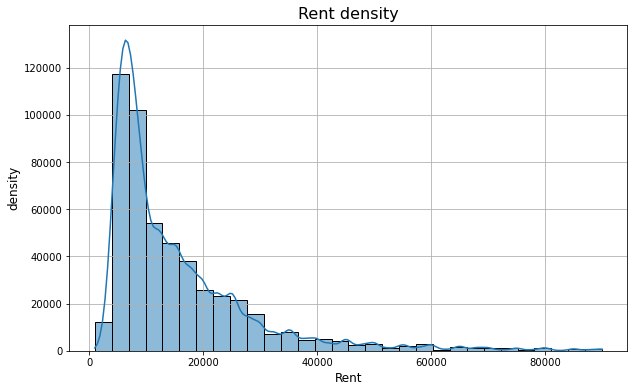

In [18]:
plt.figure(figsize=(10, 6))
sns.histplot(df['月租金'], kde=True, bins=30)

plt.title('Rent density', fontsize=16)
plt.xlabel('Rent', fontsize=12)
plt.ylabel('density', fontsize=12)
plt.grid(True)
plt.show()


In [19]:
X = df.drop(columns=['月租金']) 
y = df['月租金']

#將資料集以訓練集80％分割
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=114514)

train_set = pd.concat([X_train.reset_index(drop=True), y_train.reset_index(drop=True)], axis=1)
test_set = pd.concat([X_test.reset_index(drop=True), y_test.reset_index(drop=True)], axis=1)

train_set.to_csv('train_set.csv', index=False)
test_set.to_csv('test_set.csv', index=False)

print("Training Set Size:", train_set.shape)
print("Testing Set Size:", test_set.shape)

Training Set Size: (402799, 59)
Testing Set Size: (100700, 59)


In [20]:
df = pd.read_csv('train_set.csv')
df_test = pd.read_csv('test_set.csv')

In [21]:
df['月租金'].describe()

count    402799.000000
mean      15379.413755
std       13087.690212
min        1000.000000
25%        6800.000000
50%       10999.000000
75%       20000.000000
max       90000.000000
Name: 月租金, dtype: float64

In [22]:
df_test['月租金'].describe()

count    100700.000000
mean      15364.061619
std       13100.303432
min        1000.000000
25%        6800.000000
50%       10999.000000
75%       19800.000000
max       90000.000000
Name: 月租金, dtype: float64

In [23]:
df['押金月數'] = pd.to_numeric(df['押金月數'],errors='coerce')
df_test['押金月數'] = pd.to_numeric(df_test['押金月數'],errors='coerce')


In [24]:
df['押金月數'].isnull().sum()
#會有空值是因為押金類型為"面議"或"其他"

33443

In [25]:
df_test['押金月數'].isnull().sum()

8592

In [26]:
df['押金月數'] = df['押金月數'].fillna(0)
df_test['押金月數'] = df_test['押金月數'].fillna(0)

#填0代表押金不以月為準

In [27]:
df['需要管理費？'] = df['需要管理費？'].apply(tf_encode)
df_test['需要管理費？'] = df_test['需要管理費？'].apply(tf_encode)

In [28]:
df['提供車位？'] = df['提供車位？'].apply(tf_encode)
df_test['提供車位？'] = df_test['提供車位？'].apply(tf_encode)

In [29]:
df['需要停車費？'] = df['需要停車費？'].apply(tf_encode)
df_test['需要停車費？'] = df_test['需要停車費？'].apply(tf_encode)


In [30]:
df['月管理費'] = pd.to_numeric(df['月管理費'],errors='coerce')
df_test['月管理費'] = pd.to_numeric(df_test['月管理費'],errors='coerce')


In [31]:
df['月管理費'].isnull().sum()

35079

In [32]:
df_test['月管理費'].isnull().sum()

8882

In [33]:
df['月管理費'] = df['月管理費'].fillna(df['月管理費'].mean())
df_test['月管理費'] = df_test['月管理費'].fillna(df['月管理費'].mean())


In [34]:
df['月停車費'] = pd.to_numeric(df['月停車費'],errors='coerce').fillna(0).astype(int)
df_test['月停車費'] = pd.to_numeric(df_test['月停車費'],errors='coerce').fillna(0).astype(int)


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402799 entries, 0 to 402798
Data columns (total 59 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   縣市              402799 non-null  int64  
 1   鄉鎮市區            402799 non-null  int64  
 2   房屋曾出租過          402799 non-null  int64  
 3   押金類型            402799 non-null  int64  
 4   押金月數            402799 non-null  float64
 5   需要管理費？          402799 non-null  int64  
 6   月管理費            402799 non-null  float64
 7   提供車位？           402799 non-null  int64  
 8   需要停車費？          402799 non-null  int64  
 9   月停車費            402799 non-null  int64  
 10  建築類型            402799 non-null  int64  
 11  物件類型            402799 non-null  int64  
 12  自報頂加？           402799 non-null  object 
 13  所在樓層            402799 non-null  int64  
 14  建物樓高            402799 non-null  int64  
 15  距頂樓層數           402799 non-null  int64  
 16  坪數              402799 non-null  float64
 17  陽台數       

In [36]:
df.isnull().any()

縣市                False
鄉鎮市區              False
房屋曾出租過            False
押金類型              False
押金月數              False
需要管理費？            False
月管理費              False
提供車位？             False
需要停車費？            False
月停車費              False
建築類型              False
物件類型              False
自報頂加？             False
所在樓層              False
建物樓高              False
距頂樓層數             False
坪數                False
陽台數               False
衛浴數               False
房數                False
客廳數               False
額外費用_電費？          False
額外費用_水費？          False
額外費用_瓦斯？          False
額外費用_網路？          False
額外費用_第四台？         False
附近有_學校？           False
附近有_公園？           False
附近有_百貨公司？         False
附近有_超商？           False
附近有_傳統市場？         False
附近有_夜市？           False
附近有_醫療機構？         False
附近的捷運站數           False
附近的公車站數           False
附近的火車站數           False
附近的高鐵站數           False
附近的公共自行車數（實驗中）    False
有身份限制？            False
有性別限制？            False
性別限制              False
可炊？             

In [37]:
df['自報頂加？'] = df['自報頂加？'].apply(tf_encode)
df_test['自報頂加？'] = df_test['自報頂加？'].apply(tf_encode)

In [38]:
df['需要管理費？'] = df['需要管理費？'].apply(tf_encode)
df_test['需要管理費？'] = df_test['需要管理費？'].apply(tf_encode)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402799 entries, 0 to 402798
Data columns (total 59 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   縣市              402799 non-null  int64  
 1   鄉鎮市區            402799 non-null  int64  
 2   房屋曾出租過          402799 non-null  int64  
 3   押金類型            402799 non-null  int64  
 4   押金月數            402799 non-null  float64
 5   需要管理費？          402799 non-null  int64  
 6   月管理費            402799 non-null  float64
 7   提供車位？           402799 non-null  int64  
 8   需要停車費？          402799 non-null  int64  
 9   月停車費            402799 non-null  int64  
 10  建築類型            402799 non-null  int64  
 11  物件類型            402799 non-null  int64  
 12  自報頂加？           402799 non-null  int64  
 13  所在樓層            402799 non-null  int64  
 14  建物樓高            402799 non-null  int64  
 15  距頂樓層數           402799 non-null  int64  
 16  坪數              402799 non-null  float64
 17  陽台數       

In [40]:
df['陽台數'] = pd.to_numeric(df['陽台數'],errors='coerce')
df_test['陽台數'] = pd.to_numeric(df_test['陽台數'],errors='coerce')


In [41]:
df['陽台數'].isnull().any()

True

In [42]:
df['陽台數'] = df['陽台數'].fillna(0)
df_test['陽台數'] = df_test['陽台數'].fillna(0)

In [43]:
df['衛浴數'] = pd.to_numeric(df['衛浴數'],errors='coerce')
df_test['衛浴數'] = pd.to_numeric(df_test['衛浴數'],errors='coerce')

In [44]:
df['衛浴數'].isnull().sum()

216568

In [45]:
missing_values = df.isnull().sum()
print("Missing Values in Each Column:")
print(missing_values)

Missing Values in Each Column:
縣市                     0
鄉鎮市區                   0
房屋曾出租過                 0
押金類型                   0
押金月數                   0
需要管理費？                 0
月管理費                   0
提供車位？                  0
需要停車費？                 0
月停車費                   0
建築類型                   0
物件類型                   0
自報頂加？                  0
所在樓層                   0
建物樓高                   0
距頂樓層數                  0
坪數                     0
陽台數                    0
衛浴數               216568
房數                     0
客廳數                    0
額外費用_電費？               0
額外費用_水費？               0
額外費用_瓦斯？               0
額外費用_網路？               0
額外費用_第四台？              0
附近有_學校？                0
附近有_公園？                0
附近有_百貨公司？              0
附近有_超商？                0
附近有_傳統市場？              0
附近有_夜市？                0
附近有_醫療機構？              0
附近的捷運站數                0
附近的公車站數                0
附近的火車站數                0
附近的高鐵站數                0
附近的公共自行車數（實驗中）         0
有身份限制？             

In [46]:
df['額外費用_電費？'] = df['額外費用_電費？'].apply(tf_encode)
df_test['額外費用_電費？'] = df_test['額外費用_電費？'].apply(tf_encode)

In [47]:
df['額外費用_水費？'] = df['額外費用_水費？'].apply(tf_encode)
df_test['額外費用_水費？'] = df_test['額外費用_水費？'].apply(tf_encode)

In [48]:
df['額外費用_瓦斯？'] = df['額外費用_瓦斯？'].apply(tf_encode)
df_test['額外費用_瓦斯？'] = df_test['額外費用_瓦斯？'].apply(tf_encode)

In [49]:
df['額外費用_網路？'] = df['額外費用_網路？'].apply(tf_encode)
df_test['額外費用_網路？'] = df_test['額外費用_網路？'].apply(tf_encode)

In [50]:
df['額外費用_第四台？'] = df['額外費用_第四台？'].apply(tf_encode)
df_test['額外費用_第四台？'] = df_test['額外費用_第四台？'].apply(tf_encode)

In [51]:
df['房數'] = pd.to_numeric(df['房數'],errors='coerce')
df_test['房數'] = pd.to_numeric(df_test['房數'],errors='coerce')

In [52]:
df['房數'].isnull().sum()

216568

In [53]:
mean = int(df['房數'].mean())
df['房數'] = df['房數'].fillna(mean)
df_test['房數'] = df_test['房數'].fillna(mean)


In [54]:
df['房數'].isnull().any()

False

In [55]:
df['衛浴數'] = pd.to_numeric(df['衛浴數'],errors='coerce')
df_test['衛浴數'] = pd.to_numeric(df_test['衛浴數'],errors='coerce')


In [56]:
df['衛浴數'].isnull().sum()

216568

In [57]:
df['衛浴數'].unique()

array([nan,  1.,  2.,  3.,  0.,  4.,  5.,  6.,  9.,  8.,  7.])

In [58]:
median = int(df['衛浴數'].median())
df['衛浴數'] = df['衛浴數'].fillna(median)
df_test['衛浴數'] = df_test['衛浴數'].fillna(median)


In [59]:
df['客廳數'] = pd.to_numeric(df['客廳數'],errors='coerce')
df_test['客廳數'] = pd.to_numeric(df_test['客廳數'],errors='coerce')


In [60]:
df['客廳數'].isnull().sum()

216568

In [61]:
median = int(df['客廳數'].median())
median

2

In [62]:
df['客廳數'] = df['客廳數'].fillna(median)
df_test['客廳數'] = df_test['客廳數'].fillna(median)


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402799 entries, 0 to 402798
Data columns (total 59 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   縣市              402799 non-null  int64  
 1   鄉鎮市區            402799 non-null  int64  
 2   房屋曾出租過          402799 non-null  int64  
 3   押金類型            402799 non-null  int64  
 4   押金月數            402799 non-null  float64
 5   需要管理費？          402799 non-null  int64  
 6   月管理費            402799 non-null  float64
 7   提供車位？           402799 non-null  int64  
 8   需要停車費？          402799 non-null  int64  
 9   月停車費            402799 non-null  int64  
 10  建築類型            402799 non-null  int64  
 11  物件類型            402799 non-null  int64  
 12  自報頂加？           402799 non-null  int64  
 13  所在樓層            402799 non-null  int64  
 14  建物樓高            402799 non-null  int64  
 15  距頂樓層數           402799 non-null  int64  
 16  坪數              402799 non-null  float64
 17  陽台數       

In [64]:
df

,縣市,鄉鎮市區,房屋曾出租過,押金類型,押金月數,需要管理費？,月管理費,提供車位？,需要停車費？,月停車費,...,提供家具_熱水器？,提供家具_冷氣？,提供家具_沙發？,提供家具_洗衣機？,提供家具_衣櫃？,提供家具_冰箱？,提供家具_網路？,提供家具_第四台？,提供家具_天然瓦斯？,月租金
0,13,1309,2,0,2.0,0,0.000000,0,0,0,...,T,T,T,T,T,T,T,T,T,9000
1,16,1601,0,0,2.0,0,700.000000,0,0,0,...,T,T,F,T,T,T,T,F,F,6700
2,17,1710,1,2,0.0,0,578.930627,0,0,0,...,T,T,F,T,T,T,T,F,T,8000
3,17,1710,1,0,2.0,0,0.000000,0,0,0,...,T,T,T,T,T,T,T,T,F,16500
4,16,1625,1,0,2.0,0,0.000000,1,0,0,...,T,T,T,T,T,T,F,F,T,21000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
402794,14,1400,1,0,2.0,0,0.000000,0,0,0,...,T,T,T,T,T,T,T,T,F,5000
402795,16,1624,2,0,2.0,0,0.000000,0,0,0,...,T,T,T,T,T,T,T,T,F,6999
402796,16,1604,1,0,2.0,0,0.000000,0,0,0,...,T,T,T,T,T,T,T,T,F,6500
402797,16,1600,2,0,2.0,0,0.000000,0,0,0,...,T,T,T,T,T,T,T,T,F,12000


In [65]:

df['有身份限制？'] = df['有身份限制？'].apply(tf_encode)
df_test['有身份限制？'] = df_test['有身份限制？'].apply(tf_encode)

In [66]:

df['有性別限制？'] = df['有性別限制？'].apply(tf_encode)
df_test['有性別限制？'] = df_test['有性別限制？'].apply(tf_encode)

In [67]:

df['可炊？'] = df['可炊？'].apply(tf_encode)
df_test['可炊？'] = df_test['可炊？'].apply(tf_encode)

In [68]:
df['可寵？'] = df['可寵？'].apply(tf_encode)
df_test['可寵？'] = df_test['可寵？'].apply(tf_encode)

In [69]:
df['有產權登記？'] = df['有產權登記？'].apply(tf_encode)
df_test['有產權登記？'] = df_test['有產權登記？'].apply(tf_encode)

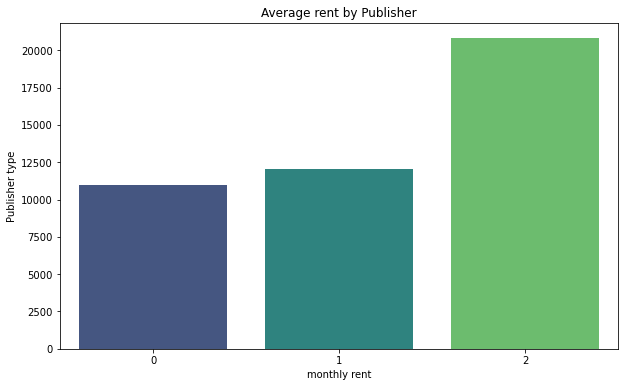

In [70]:
avg = df.groupby('刊登者類型')['月租金'].mean().sort_values()

plt.figure(figsize=(10, 6))
sns.barplot(x=avg.index, y=avg, palette='viridis')
plt.xlabel('monthly rent')
plt.ylabel('Publisher type')
plt.title('Average rent by Publisher')
plt.show()

In [71]:
#可以看出，2(房仲）的平均租金高於 0(屋主)&1（代理人）


In [72]:
df['提供家具_床？'] = df['提供家具_床？'].apply(tf_encode)
df_test['提供家具_床？'] = df_test['提供家具_床？'].apply(tf_encode)

In [73]:
df['提供家具_桌子？'] = df['提供家具_桌子？'].apply(tf_encode)
df_test['提供家具_桌子？'] = df_test['提供家具_桌子？'].apply(tf_encode)

In [74]:
df['提供家具_椅子？'] = df['提供家具_椅子？'].apply(tf_encode)
df_test['提供家具_椅子？'] = df_test['提供家具_椅子？'].apply(tf_encode)

In [75]:
df['提供家具_電視？'] = df['提供家具_電視？'].apply(tf_encode)
df_test['提供家具_電視？'] = df_test['提供家具_電視？'].apply(tf_encode)

In [76]:
df['提供家具_熱水器？'] = df['提供家具_熱水器？'].apply(tf_encode)
df_test['提供家具_熱水器？'] = df_test['提供家具_熱水器？'].apply(tf_encode)

In [77]:
df['提供家具_冷氣？'] = df['提供家具_冷氣？'].apply(tf_encode)
df_test['提供家具_冷氣？'] = df_test['提供家具_冷氣？'].apply(tf_encode)

In [78]:
df['提供家具_沙發？'] = df['提供家具_沙發？'].apply(tf_encode)
df_test['提供家具_沙發？'] = df_test['提供家具_沙發？'].apply(tf_encode)

In [79]:
df['提供家具_洗衣機？'] = df['提供家具_洗衣機？'].apply(tf_encode)
df_test['提供家具_洗衣機？'] = df_test['提供家具_洗衣機？'].apply(tf_encode)

In [80]:
df['提供家具_衣櫃？'] = df['提供家具_衣櫃？'].apply(tf_encode)
df_test['提供家具_衣櫃？'] = df_test['提供家具_衣櫃？'].apply(tf_encode)

In [81]:
df['提供家具_冰箱？'] = df['提供家具_冰箱？'].apply(tf_encode)
df_test['提供家具_冰箱？'] = df_test['提供家具_冰箱？'].apply(tf_encode)

In [82]:
df['提供家具_網路？'] = df['提供家具_網路？'].apply(tf_encode)
df_test['提供家具_網路？'] = df_test['提供家具_網路？'].apply(tf_encode)

In [83]:
df['提供家具_第四台？'] = df['提供家具_第四台？'].apply(tf_encode)
df_test['提供家具_第四台？'] = df_test['提供家具_第四台？'].apply(tf_encode)

In [84]:
df['提供家具_天然瓦斯？'] = df['提供家具_天然瓦斯？'].apply(tf_encode)
df_test['提供家具_天然瓦斯？'] = df_test['提供家具_天然瓦斯？'].apply(tf_encode)

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402799 entries, 0 to 402798
Data columns (total 59 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   縣市              402799 non-null  int64  
 1   鄉鎮市區            402799 non-null  int64  
 2   房屋曾出租過          402799 non-null  int64  
 3   押金類型            402799 non-null  int64  
 4   押金月數            402799 non-null  float64
 5   需要管理費？          402799 non-null  int64  
 6   月管理費            402799 non-null  float64
 7   提供車位？           402799 non-null  int64  
 8   需要停車費？          402799 non-null  int64  
 9   月停車費            402799 non-null  int64  
 10  建築類型            402799 non-null  int64  
 11  物件類型            402799 non-null  int64  
 12  自報頂加？           402799 non-null  int64  
 13  所在樓層            402799 non-null  int64  
 14  建物樓高            402799 non-null  int64  
 15  距頂樓層數           402799 non-null  int64  
 16  坪數              402799 non-null  float64
 17  陽台數       

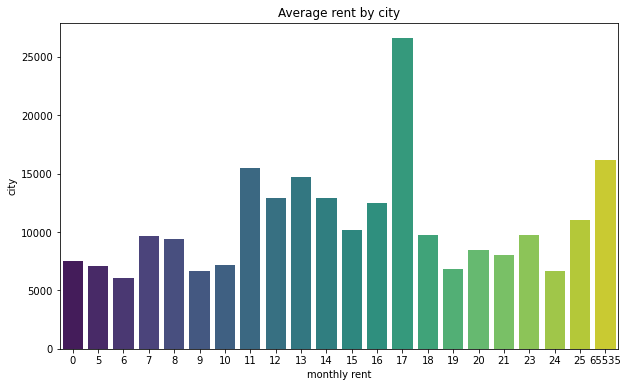

In [86]:
avg = df.groupby('縣市')['月租金'].mean().sort_values()

plt.figure(figsize=(10, 6))
sns.barplot(x=avg.index, y=avg, palette='viridis')
plt.xlabel('monthly rent')
plt.ylabel('city')
plt.title('Average rent by city')
plt.show()

In [87]:
#可以看出 編碼17（台北市）的平均租金高於其他縣市，對縣市重新編碼
#平均租金前5高的縣市：台北市（17）、新竹縣（13）、新北市（11）、新竹市（12）、桃園市（14）
#從圖表來看，桃園市（14）與 台中市（16）、台南市（18）、高雄市（25）並無明顯差異


In [88]:
#計算訓練集中每個縣市對應目標變數的均值
target_mean = df.groupby('縣市')['月租金'].mean()
print("每個縣市的月租金均值：")
print(target_mean)

#將均值映射到訓練集和測試集
df['縣市_encoded'] = df['縣市'].map(target_mean)
df_test['縣市_encoded'] = df_test['縣市'].map(target_mean)

#處理測試集中不存在於訓練集的類別
# （用訓練集目標均值的整體均值填補）
global_mean = df['月租金'].mean()
df_test['縣市_encoded'] = df_test['縣市_encoded'].fillna(global_mean)


每個縣市的月租金均值：
縣市
0         7552.409403
5         7080.914768
6         6081.163636
7         9663.655143
8         9410.782266
9         6671.015461
10        7148.637366
11       15489.203146
12       12917.477035
13       14726.426893
14       12910.834574
15       10166.666667
16       12513.551302
17       26601.553998
18        9779.658569
19        6854.664723
20        8471.151977
21        8059.547521
23        9752.320675
24        6675.592593
25       10994.689754
65535    16159.096640
Name: 月租金, dtype: float64


In [89]:
average_rent = df.groupby('鄉鎮市區')['月租金'].mean()

#找出平均月租金最高的前 5 名
top5_districts = average_rent.nlargest(5)

print("平均月租金最高的前 5 名：")
print(top5_districts)

平均月租金最高的前 5 名：
鄉鎮市區
2300    50000.000000
1836    38000.000000
1708    32202.839933
1702    28534.318468
1703    27983.351395
Name: 月租金, dtype: float64


In [90]:

encoding_df = pd.read_csv('編碼表.鄉鎮市區.csv')


In [91]:
encoding_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 369 entries, 0 to 368
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   編碼      369 non-null    int64 
 1   代表      369 non-null    object
 2   發行日期    369 non-null    object
dtypes: int64(1), object(2)
memory usage: 8.8+ KB


In [92]:
#計算每個鄉鎮市區的樣本數
township_counts = df['鄉鎮市區'].value_counts()

#設定樣本數閾值為 10
threshold = 30

#過濾掉樣本數少於閾值的鄉鎮市區
filtered_townships = township_counts[township_counts >= threshold].index
df_filtered = df[df['鄉鎮市區'].isin(filtered_townships)]

#計算每個鄉鎮市區的平均月租金
average_rent = df_filtered.groupby('鄉鎮市區')['月租金'].mean().reset_index()

#找出平均月租金前10高的鄉鎮市區
top5_codes = average_rent.nlargest(10, '月租金')

#確保「代表」和「鄉鎮市區」的型態一致，將「鄉鎮市區」轉換為整數型資料
top5_codes['鄉鎮市區'] = top5_codes['鄉鎮市區'].astype(int)

#將編碼表中的「鄉鎮市區」名稱對應到 top5
top5_with_names = top5_codes.merge(encoding_df[['編碼', '代表']], left_on='鄉鎮市區', right_on='編碼', how='left')

# 顯示結果
print(top5_with_names)


   鄉鎮市區           月租金    編碼      代表
0  1708  32202.839933  1708  臺北市大安區
1  1702  28534.318468  1702  臺北市信義區
2  1703  27983.351395  1703  臺北市內湖區
3  1706  27091.686623  1706  臺北市士林區
4  1700  27037.439677  1700  臺北市中山區
5  1710  26327.482000  1710  臺北市松山區
6  1704  25625.491657  1704  臺北市北投區
7  1705  25057.390438  1705  臺北市南港區
8  1701  24499.574973  1701  臺北市中正區
9  1707  23453.280597  1707  臺北市大同區


In [93]:

# 計算鄉鎮市區的樣本數
township_counts = df['鄉鎮市區'].value_counts()

# 計算每個鄉鎮市區的平均月租金
township_avg_rent = df.groupby('鄉鎮市區')['月租金'].mean()

# 計算每個縣市的平均月租金
county_avg_rent = df.groupby('縣市')['月租金'].mean()

# 對 `鄉鎮市區` 進行 Target Encoding
def target_encode(row):
    township_code = row['鄉鎮市區']
    
    if township_code in township_counts.index and township_counts[township_code] > 30:
        # 若鄉鎮市區的樣本數大於 30，返回鄉鎮市區的平均月租金
        return township_avg_rent.get(township_code, None)  # 如果找不到對應的編碼，返回 None
    else:
        # 若鄉鎮市區的樣本數小於 30 或該編碼不存在，返回縣市的平均月租金
        county_code = row['縣市']  # 確保資料中有縣市欄位
        return county_avg_rent.get(county_code, None)  # 若縣市的平均值不存在，返回 None

# 使用 `target_encode` 函數對 `鄉鎮市區` 欄位進行編碼
df['鄉鎮市區_encoded'] = df.apply(target_encode, axis=1)

# 對 df_test 也進行同樣的處理
df_test['鄉鎮市區_encoded'] = df_test.apply(target_encode, axis=1)

print(df[['鄉鎮市區', '鄉鎮市區_encoded']].head())
print(df_test[['鄉鎮市區', '鄉鎮市區_encoded']].head())


   鄉鎮市區  鄉鎮市區_encoded
0  1309  17199.452544
1  1601   9228.953497
2  1710  26327.482000
3  1710  26327.482000
4  1625  15532.151744
   鄉鎮市區  鄉鎮市區_encoded
0  1104  19121.637484
1  1704  25625.491657
2  1404  12506.934089
3  1625  15532.151744
4  1306   7306.077473


In [94]:
df['鄉鎮市區_encoded'].isnull().sum()

0

In [95]:
df_test['鄉鎮市區_encoded'].isnull().sum()

0

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402799 entries, 0 to 402798
Data columns (total 61 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   縣市              402799 non-null  int64  
 1   鄉鎮市區            402799 non-null  int64  
 2   房屋曾出租過          402799 non-null  int64  
 3   押金類型            402799 non-null  int64  
 4   押金月數            402799 non-null  float64
 5   需要管理費？          402799 non-null  int64  
 6   月管理費            402799 non-null  float64
 7   提供車位？           402799 non-null  int64  
 8   需要停車費？          402799 non-null  int64  
 9   月停車費            402799 non-null  int64  
 10  建築類型            402799 non-null  int64  
 11  物件類型            402799 non-null  int64  
 12  自報頂加？           402799 non-null  int64  
 13  所在樓層            402799 non-null  int64  
 14  建物樓高            402799 non-null  int64  
 15  距頂樓層數           402799 non-null  int64  
 16  坪數              402799 non-null  float64
 17  陽台數       

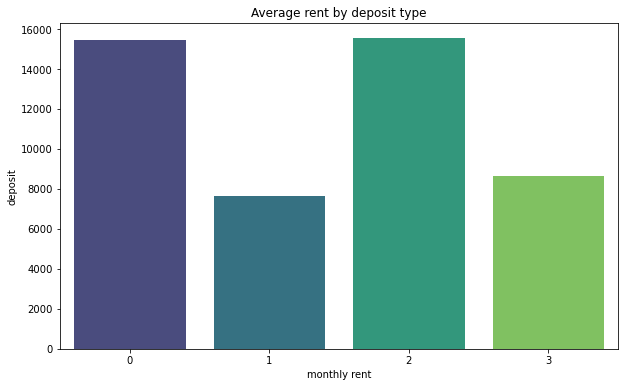

In [97]:
avg = df.groupby('押金類型')['月租金'].mean().sort_values()

plt.figure(figsize=(10, 6))
sns.barplot(x=avg.index, y=avg, palette='viridis')
plt.xlabel('monthly rent')
plt.ylabel('deposit')
plt.title('Average rent by deposit type')
plt.show()

In [98]:
#對押金類型做label encode
mapping_deposit = {
    3:0,
    1:0,
    2:2,
    0:1
}
df['押金類型_encoded'] = df['押金類型'].map(mapping_deposit)


In [99]:
print(df[['押金類型', '押金類型_encoded']].head())

   押金類型  押金類型_encoded
0     0             1
1     0             1
2     2             2
3     0             1
4     0             1


In [100]:
df_test['押金類型_encoded'] = df_test['押金類型'].map(mapping_deposit)


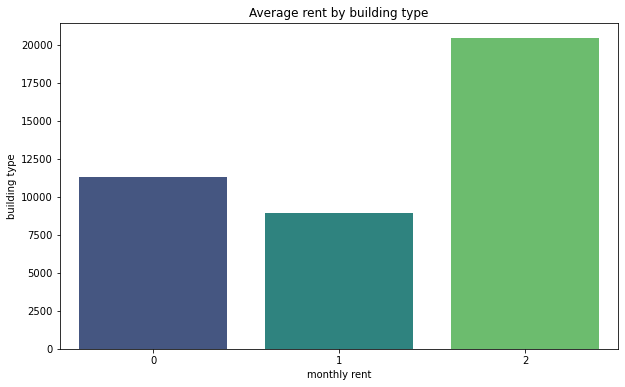

In [101]:
avg = df.groupby('建築類型')['月租金'].mean().sort_values()

plt.figure(figsize=(10, 6))
sns.barplot(x=avg.index, y=avg, palette='viridis')
plt.xlabel('monthly rent')
plt.ylabel('building type')
plt.title('Average rent by building type')
plt.show()

In [102]:
def label_building(data):
    if data == 1:
        return 1
    elif data == 0:
        return 0
    elif data == 2:
        return 2
    else: 
        return 0
df['建築類型_encoded'] = df['建築類型'].apply(label_building)
df_test['建築類型_encoded'] = df_test['建築類型'].apply(label_building)

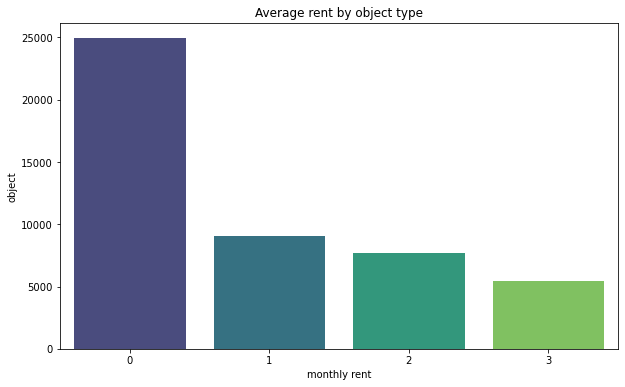

In [103]:
avg = df.groupby('物件類型')['月租金'].mean().sort_values()

plt.figure(figsize=(10, 6))
sns.barplot(x=avg.index, y=avg, palette='viridis')
plt.xlabel('monthly rent')
plt.ylabel('object')
plt.title('Average rent by object type')
plt.show()

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402799 entries, 0 to 402798
Data columns (total 63 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   縣市              402799 non-null  int64  
 1   鄉鎮市區            402799 non-null  int64  
 2   房屋曾出租過          402799 non-null  int64  
 3   押金類型            402799 non-null  int64  
 4   押金月數            402799 non-null  float64
 5   需要管理費？          402799 non-null  int64  
 6   月管理費            402799 non-null  float64
 7   提供車位？           402799 non-null  int64  
 8   需要停車費？          402799 non-null  int64  
 9   月停車費            402799 non-null  int64  
 10  建築類型            402799 non-null  int64  
 11  物件類型            402799 non-null  int64  
 12  自報頂加？           402799 non-null  int64  
 13  所在樓層            402799 non-null  int64  
 14  建物樓高            402799 non-null  int64  
 15  距頂樓層數           402799 non-null  int64  
 16  坪數              402799 non-null  float64
 17  陽台數       

In [105]:
df = df.drop(columns = ['縣市','鄉鎮市區','押金類型','建築類型'])

In [106]:
df_test = df_test.drop(columns = ['縣市','鄉鎮市區','押金類型','建築類型'])

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402799 entries, 0 to 402798
Data columns (total 59 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   房屋曾出租過          402799 non-null  int64  
 1   押金月數            402799 non-null  float64
 2   需要管理費？          402799 non-null  int64  
 3   月管理費            402799 non-null  float64
 4   提供車位？           402799 non-null  int64  
 5   需要停車費？          402799 non-null  int64  
 6   月停車費            402799 non-null  int64  
 7   物件類型            402799 non-null  int64  
 8   自報頂加？           402799 non-null  int64  
 9   所在樓層            402799 non-null  int64  
 10  建物樓高            402799 non-null  int64  
 11  距頂樓層數           402799 non-null  int64  
 12  坪數              402799 non-null  float64
 13  陽台數             402799 non-null  float64
 14  衛浴數             402799 non-null  float64
 15  房數              402799 non-null  float64
 16  客廳數             402799 non-null  float64
 17  額外費用_電費？  

In [108]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100700 entries, 0 to 100699
Data columns (total 59 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   房屋曾出租過          100700 non-null  int64  
 1   押金月數            100700 non-null  float64
 2   需要管理費？          100700 non-null  int64  
 3   月管理費            100700 non-null  float64
 4   提供車位？           100700 non-null  int64  
 5   需要停車費？          100700 non-null  int64  
 6   月停車費            100700 non-null  int64  
 7   物件類型            100700 non-null  int64  
 8   自報頂加？           100700 non-null  int64  
 9   所在樓層            100700 non-null  int64  
 10  建物樓高            100700 non-null  int64  
 11  距頂樓層數           100700 non-null  int64  
 12  坪數              100700 non-null  float64
 13  陽台數             100700 non-null  float64
 14  衛浴數             100700 non-null  float64
 15  房數              100700 non-null  float64
 16  客廳數             100700 non-null  float64
 17  額外費用_電費？  

In [109]:
df.isnull().sum()

房屋曾出租過            0
押金月數              0
需要管理費？            0
月管理費              0
提供車位？             0
需要停車費？            0
月停車費              0
物件類型              0
自報頂加？             0
所在樓層              0
建物樓高              0
距頂樓層數             0
坪數                0
陽台數               0
衛浴數               0
房數                0
客廳數               0
額外費用_電費？          0
額外費用_水費？          0
額外費用_瓦斯？          0
額外費用_網路？          0
額外費用_第四台？         0
附近有_學校？           0
附近有_公園？           0
附近有_百貨公司？         0
附近有_超商？           0
附近有_傳統市場？         0
附近有_夜市？           0
附近有_醫療機構？         0
附近的捷運站數           0
附近的公車站數           0
附近的火車站數           0
附近的高鐵站數           0
附近的公共自行車數（實驗中）    0
有身份限制？            0
有性別限制？            0
性別限制              0
可炊？               0
可寵？               0
有產權登記？            0
刊登者類型             0
提供家具_床？           0
提供家具_桌子？          0
提供家具_椅子？          0
提供家具_電視？          0
提供家具_熱水器？         0
提供家具_冷氣？          0
提供家具_沙發？          0
提供家具_洗衣機？         0
提供家具_衣櫃？          0


In [110]:
df_test.isnull().sum()

房屋曾出租過            0
押金月數              0
需要管理費？            0
月管理費              0
提供車位？             0
需要停車費？            0
月停車費              0
物件類型              0
自報頂加？             0
所在樓層              0
建物樓高              0
距頂樓層數             0
坪數                0
陽台數               0
衛浴數               0
房數                0
客廳數               0
額外費用_電費？          0
額外費用_水費？          0
額外費用_瓦斯？          0
額外費用_網路？          0
額外費用_第四台？         0
附近有_學校？           0
附近有_公園？           0
附近有_百貨公司？         0
附近有_超商？           0
附近有_傳統市場？         0
附近有_夜市？           0
附近有_醫療機構？         0
附近的捷運站數           0
附近的公車站數           0
附近的火車站數           0
附近的高鐵站數           0
附近的公共自行車數（實驗中）    0
有身份限制？            0
有性別限制？            0
性別限制              0
可炊？               0
可寵？               0
有產權登記？            0
刊登者類型             0
提供家具_床？           0
提供家具_桌子？          0
提供家具_椅子？          0
提供家具_電視？          0
提供家具_熱水器？         0
提供家具_冷氣？          0
提供家具_沙發？          0
提供家具_洗衣機？         0
提供家具_衣櫃？          0


In [111]:
df.to_csv('cleaned_data/train_cleaned.csv', index=False)
df_test.to_csv('cleaned_data/test_cleaned.csv', index=False)